# COVID19_Prediction : Master 1 Project (USTHB)

## Introduction

Using Deep Learning and Machine Learning Techniques, our teacher asked us to answer the following question :  
"Does the food diet influence the cumulative numbers of contaminations and deaths due to COVID-19 ?"

## Data

We will use two different databases, the first one (found on link : https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) contains a lot of information on daily contaminations and deaths due to COVID-19 as well as numbers cumulated by country between the month of March and the month of December 2020.

The second one “Dietary Intake Estimates” , (found on website : https://www.globaldietarydatabase.org/) gives a huge amount of data on food diet by country, by sub-region, and globally.

## Steps

The problem should be devided into two parts, the first one answers the question concerning deaths only, and the second one concerns the cumulative numbers.

Here are the steps I followed :

- Analyse, correct, encode and scale the two datasets.
- Merge Covid base and Diet Base.
- Choose the appropriate model. This problem belongs to the Supervised Learning, specificly the numerical regression. I have tested the most popular and appropriate models and compared their performance (Linear Regression, Decision Trees, Random Forsets and Artificial Neural Networks).

In [1]:
import math
import numpy as np
import pandas as pd  
import seaborn as sns   
from scipy import stats
import sys
import matplotlib.pyplot as plt  
import plotly.express as px 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split                         
from sklearn.tree import DecisionTreeRegressor                  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression               
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import KBinsDiscretizer

# Diet Base

**1. Load data**


*  Analyze the number of rows and features.
*  Understand and analyze the values.
* analyse correlation between attributs


In [2]:
dietBase = pd.read_csv('/kaggle/input/covid-diet-data/all_cnty_yr_2015.csv')
dietBase.shape

(139860, 40)

In [3]:
dietBase

superregion2 iso3  countryname  female  age  urban  edu  v01_wt_median  \
0             SAARC  AFG  Afghanistan       0    2      0    1      47.413273   
1             SAARC  AFG  Afghanistan       0    2      0    2      59.956844   
2             SAARC  AFG  Afghanistan       0    2      0    3      70.714760   
3             SAARC  AFG  Afghanistan       0    2      0  999      48.884312   
4             SAARC  AFG  Afghanistan       0    2      1    1      55.521770   
...             ...  ...          ...     ...  ...    ...  ...            ...   
139855          SSA  ZWE     Zimbabwe     999  999      1  999      89.854965   
139856          SSA  ZWE     Zimbabwe     999  999    999    1      68.779266   
139857          SSA  ZWE     Zimbabwe     999  999    999    2      87.059586   
139858          SSA  ZWE     Zimbabwe     999  999    999    3     109.648410   
139859          SSA  ZWE     Zimbabwe     999  999    999  999      78.436821   

        v01_lowerci_95  v01_upperci_95  ...  v23_upperci_95  v36_wt_median  \
0            26.237797       84.176018  ...       58.883312      255.40314   
1            32.680233      110.521920  ...       61.194340      266.46301   
2            37.900639      128.872090  ...       61.337482      283.05048   
3            26.237797      128.872090  ...       61.337482      257.05252   
4            30.984436       99.499596  ...       60.872921      268.53934   
...                ...             ...  ...             ...            ...   
139855       48.753170      180.243730  ...      141.381180      465.41437   
139856       39.879131      112.427360  ...      131.301120      484.62579   
139857       50.266865      142.163940  ...      137.029980      476.48224   
139858       63.109200      180.243730  ...      141.381180      506.30121   
139859       39.879131      180.243730  ...      141.381180      484.78281   

        v36_lowerci_95  v36_upperci_95  v41_wt_median  v41_lowerci_95  \
0            134.21686       458.62183      1988.4474       999.12262   
1            144.65649       484.50241      2036.7220      1054.16890   
2            152.73541       509.11826      2105.3442      1082.03920   
3            134.21686       509.11826      1995.4592       999.12262   
4            140.64723       486.56586      1887.2854       962.28314   
...                ...             ...            ...             ...   
139855       243.28893       971.91095      1329.3700       276.21921   
139856       255.12506       984.37024      1415.4803       286.49463   
139857       243.28893       979.20245      1425.1400       276.21921   
139858       259.24951      1038.48820      1446.4594       289.36285   
139859       243.28893      1038.48820      1421.6328       276.21921   

        v41_upperci_95  v57_wt_median  v57_lowerci_95  v57_upperci_95  
0            3863.7734     103.847820       34.508781       307.00015  
1            3968.9531     141.322830       49.329239       408.49686  
2            4248.7339     177.695850       60.637211       535.30798  
3            4248.7339     108.452680       34.508781       535.30798  
4            3679.2844     121.987970       41.345661       385.12958  
...                ...            ...             ...             ...  
139855       6991.2603      69.526268       34.842648       410.39999  
139856       7463.6157      40.462524       22.885603       164.87851  
139857       7350.4268      62.510635       35.240677       253.65860  
139858       7644.8521     100.854260       56.493141       410.39999  
139859       7644.8521      53.351601       22.885603       410.39999  

[139860 rows x 40 columns]

In [4]:
dietBase.describe()

female            age          urban            edu  \
count  139860.000000  139860.000000  139860.000000  139860.000000   
mean      333.333333      94.714286     333.333333     251.250000   
std       470.699274     204.153367     470.699274     431.715786   
min         0.000000       2.000000       0.000000       1.000000   
25%         0.000000      27.000000       0.000000       1.750000   
50%         1.000000      52.000000       1.000000       2.500000   
75%       999.000000      77.000000     999.000000     252.000000   
max       999.000000     999.000000     999.000000     999.000000   

       v01_wt_median  v01_lowerci_95  v01_upperci_95  v02_wt_median  \
count  139860.000000   139860.000000   139860.000000  139860.000000   
mean      103.827008       78.897856      143.029308     126.953380   
std        40.798558       34.585030       57.274935      50.252758   
min         0.000000       13.690791       21.497295       0.000000   
25%        75.012026       54.523563       99.600258      93.960960   
50%        97.452759       72.099545      134.876830     122.135355   
75%       126.400742       96.900057      178.546390     155.050443   
max       323.399080      260.281250      397.248080     353.184720   

       v02_lowerci_95  v02_upperci_95  ...  v23_upperci_95  v36_wt_median  \
count   139860.000000   139860.000000  ...   139860.000000  139860.000000   
mean        96.972457      174.188040  ...      107.778264     647.922198   
std         44.092261       80.557009  ...       25.456638     190.566996   
min          8.351087       14.417123  ...       27.039885       0.000000   
25%         65.841080      120.064387  ...       91.144768     498.210995   
50%         94.246422      159.204960  ...      109.122330     622.391390   
75%        120.706820      215.451000  ...      123.240710     740.571408   
max        312.189730      616.672360  ...      222.060330    1844.257900   

       v36_lowerci_95  v36_upperci_95  v41_wt_median  v41_lowerci_95  \
count   139860.000000   139860.000000  139860.000000   139860.000000   
mean       467.879348      944.613155    2480.730469     1441.815393   
std        199.809806      262.223455     771.733490      696.609465   
min        127.369870      287.067380       0.000000      263.671020   
25%        311.646742      766.257080    1971.126550     1045.093000   
50%        414.754195      901.532350    2361.231550     1278.191050   
75%        543.859070     1119.046600    2902.605125     1633.273275   
max       1595.027000     2278.075900    8017.109900     7328.938500   

       v41_upperci_95  v57_wt_median  v57_lowerci_95  v57_upperci_95  
count   139860.000000  139860.000000   139860.000000   139860.000000  
mean      4616.752437      85.240764       46.831253      189.574410  
std       1891.883358      56.797424       37.886935      138.078004  
min       1191.382400       0.000000        3.145120        5.156832  
25%       3495.385700      46.473399       20.607042       92.024559  
50%       4374.385300      72.747707       36.544172      155.231780  
75%       5350.827900     109.380687       61.844700      248.420825  
max      23627.408000     690.844480      511.984410     1026.079300  

[8 rows x 37 columns]

<AxesSubplot:>

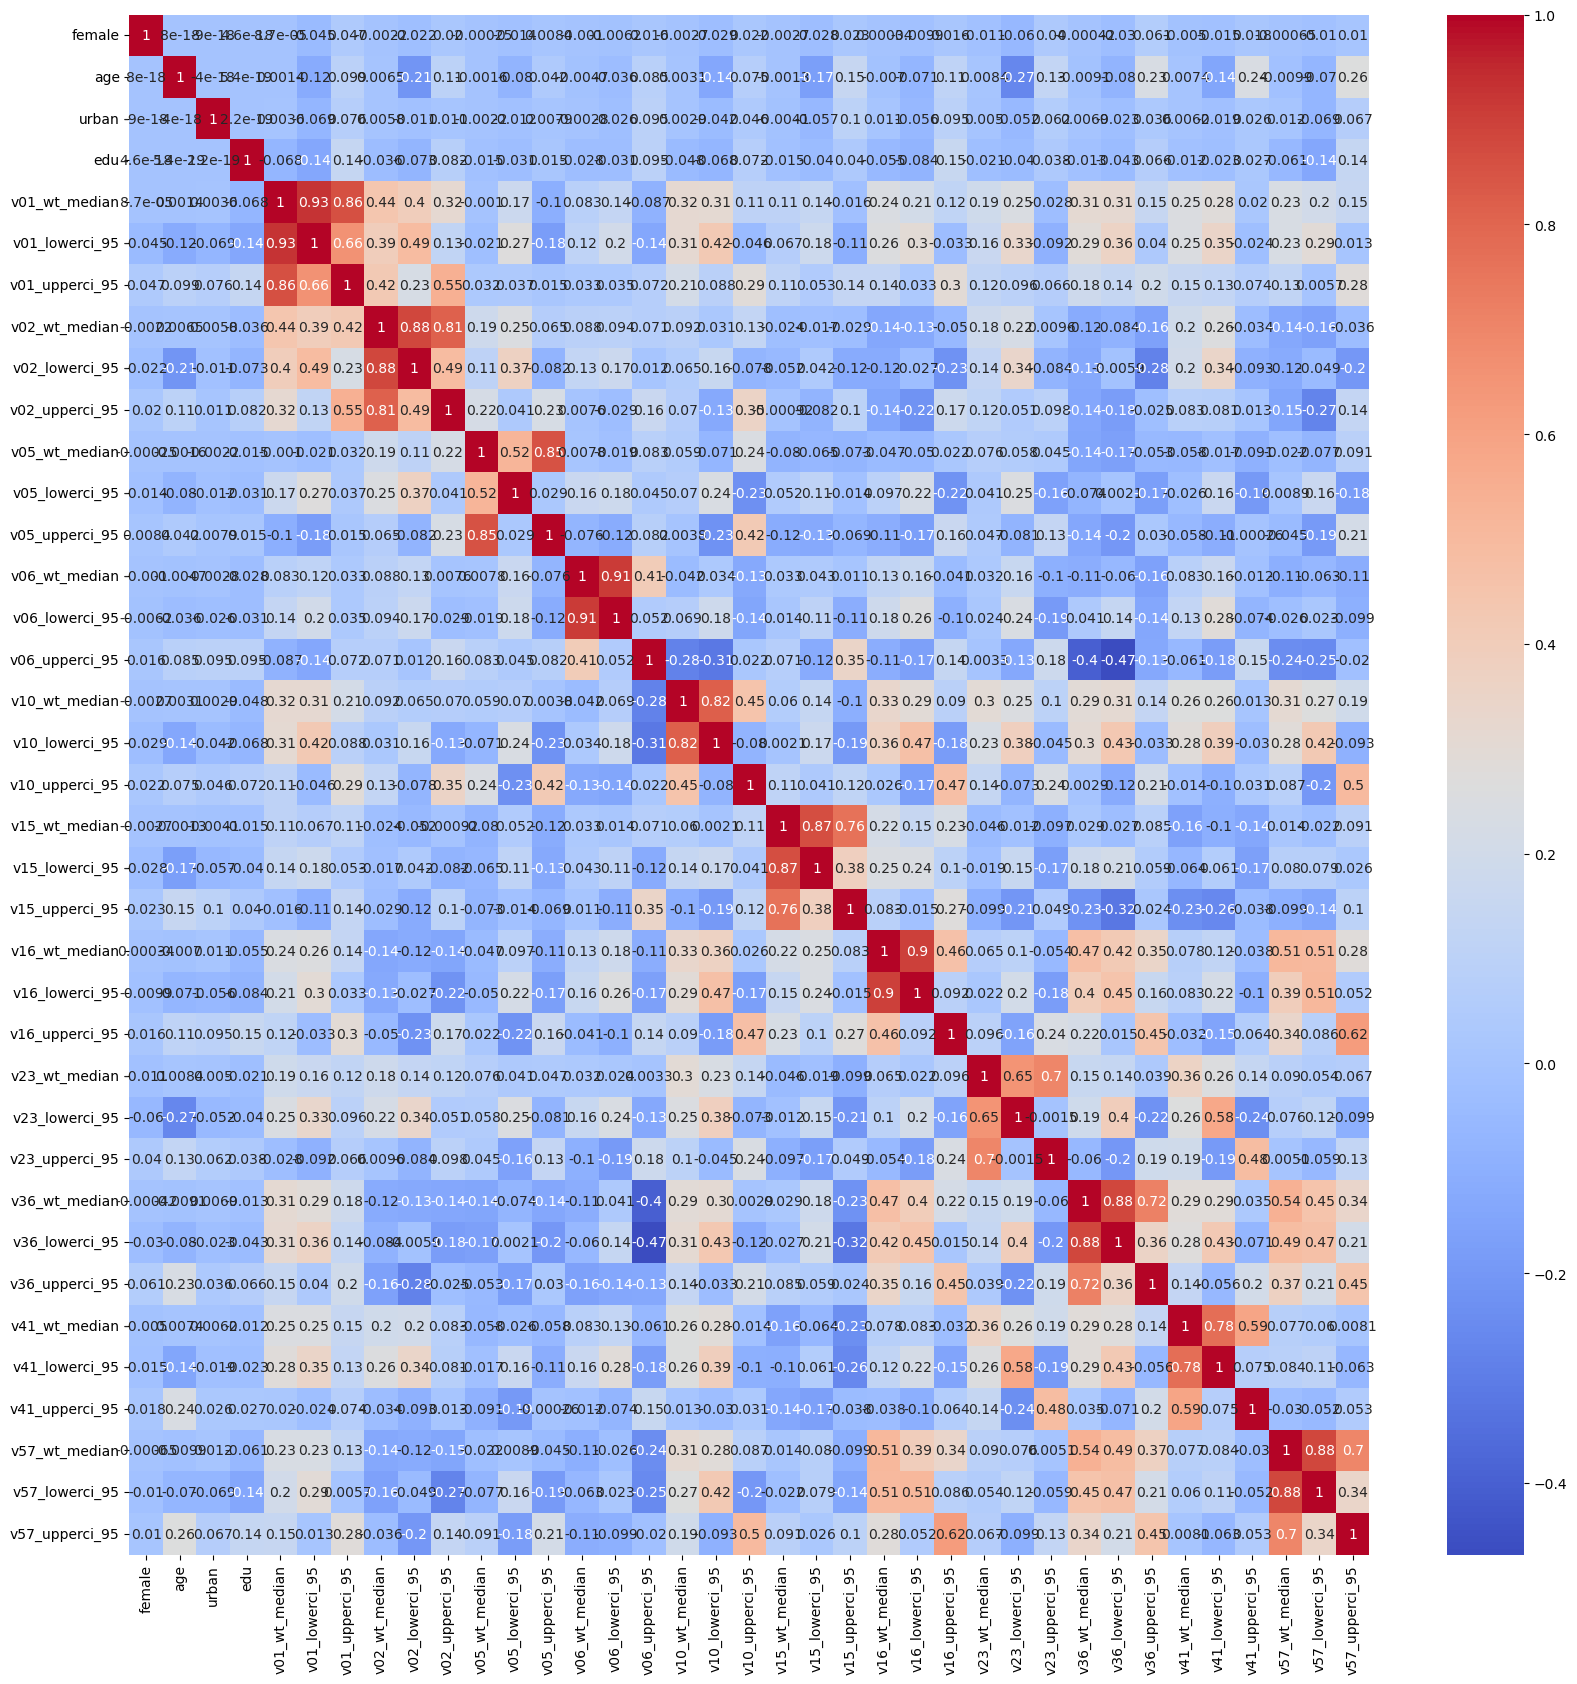

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(dietBase.corr(), annot=True, cmap="coolwarm")

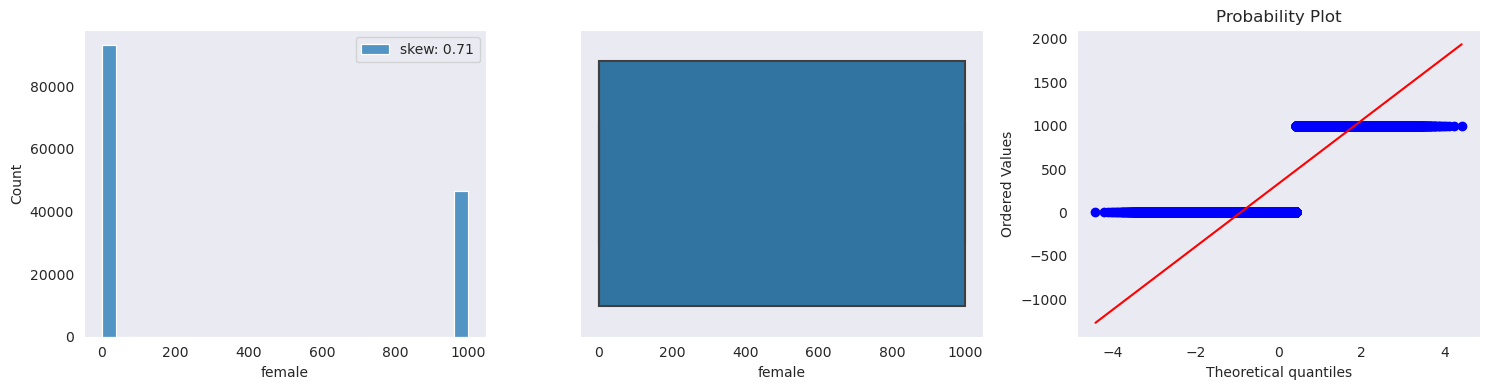

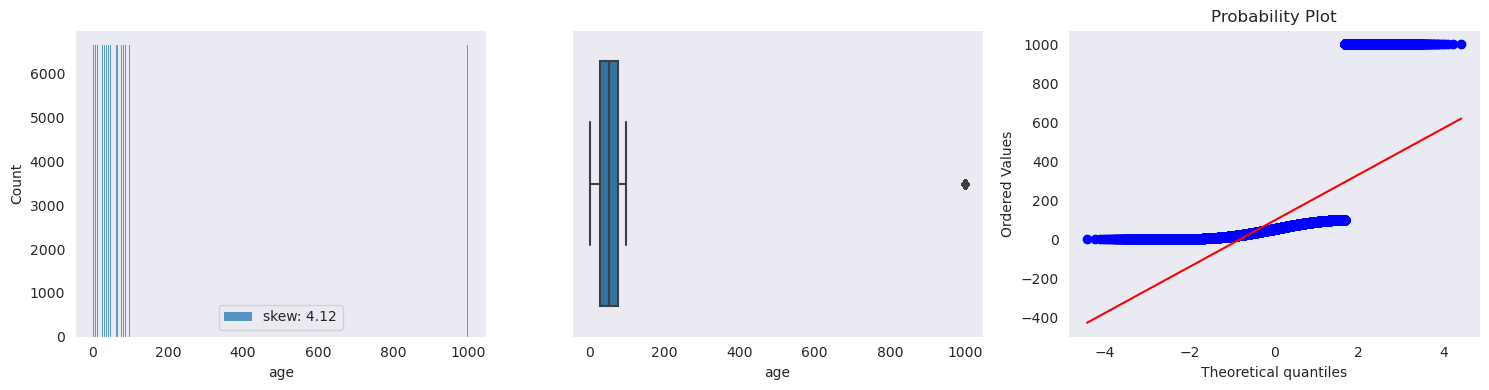

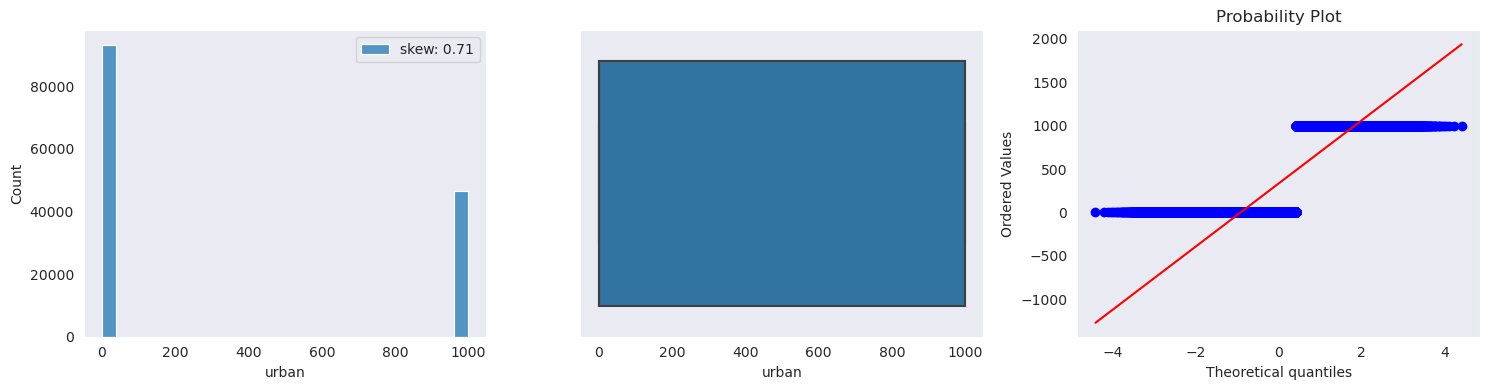

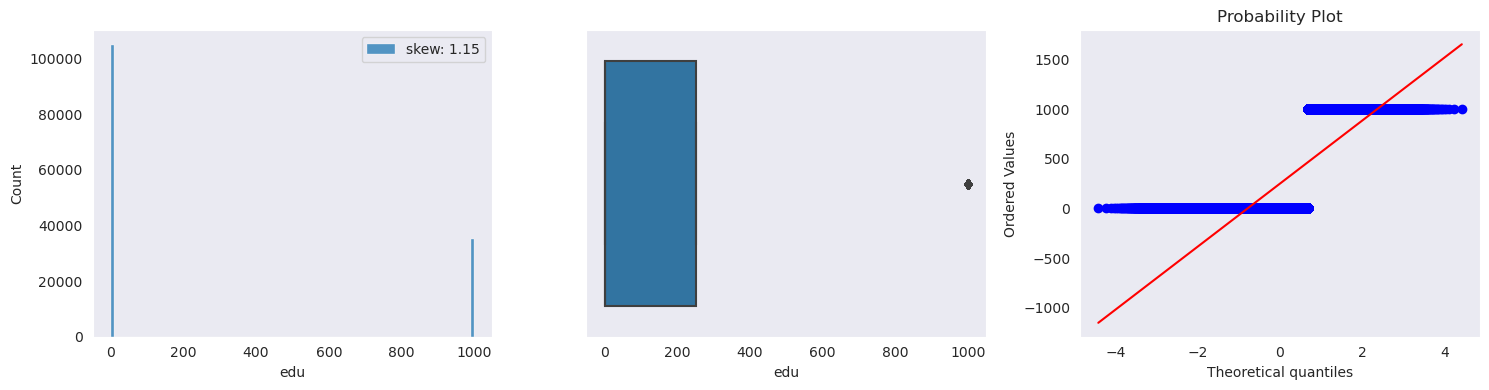

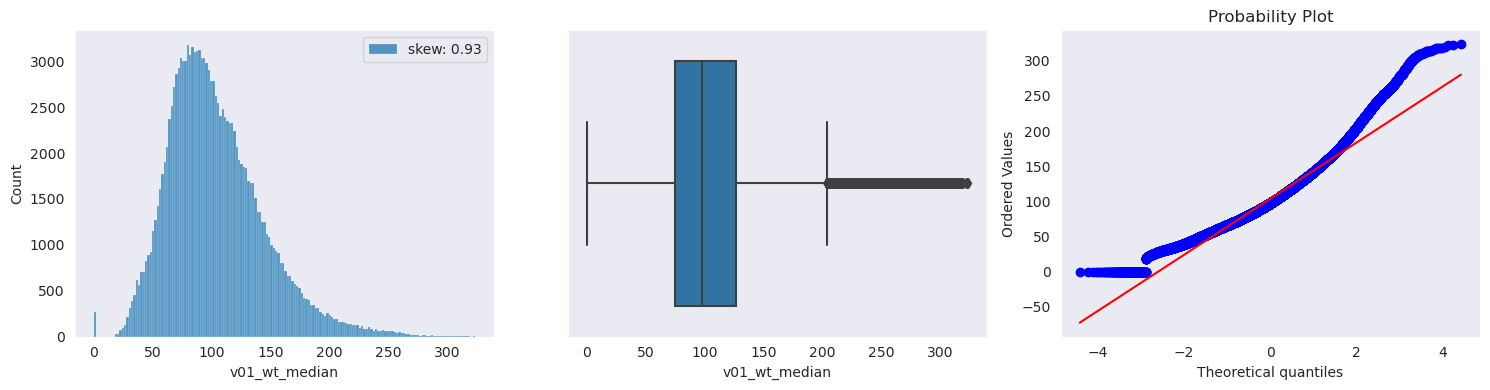

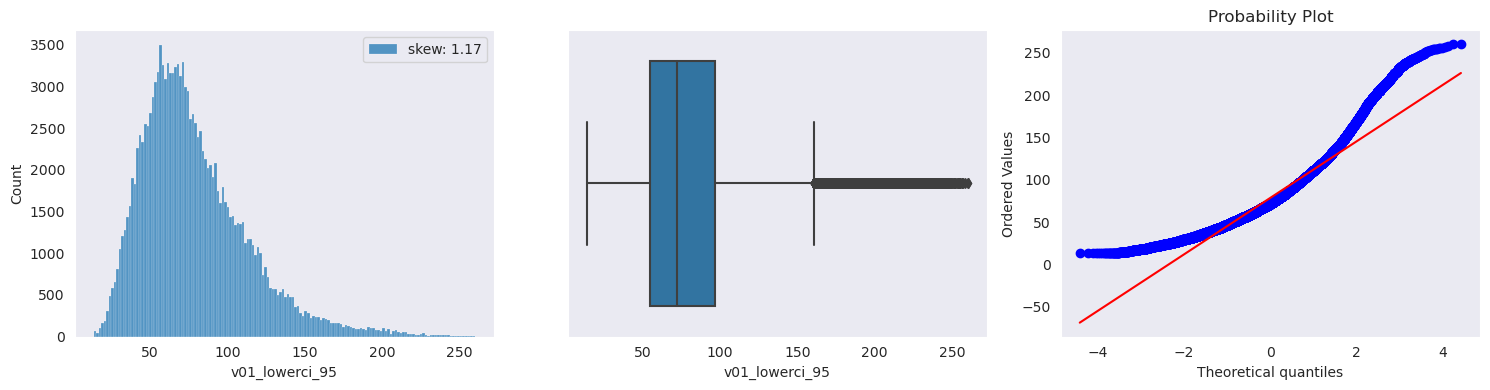

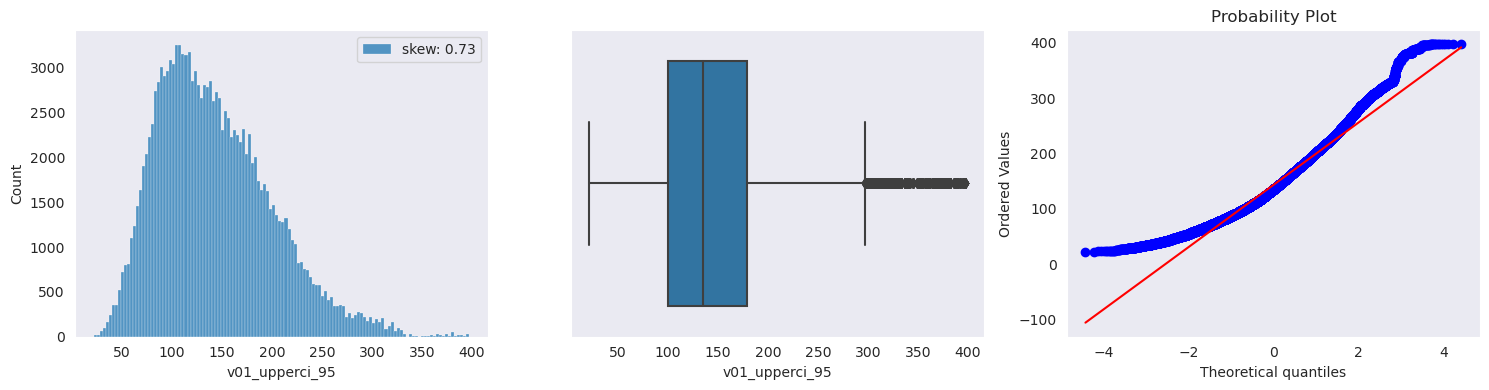

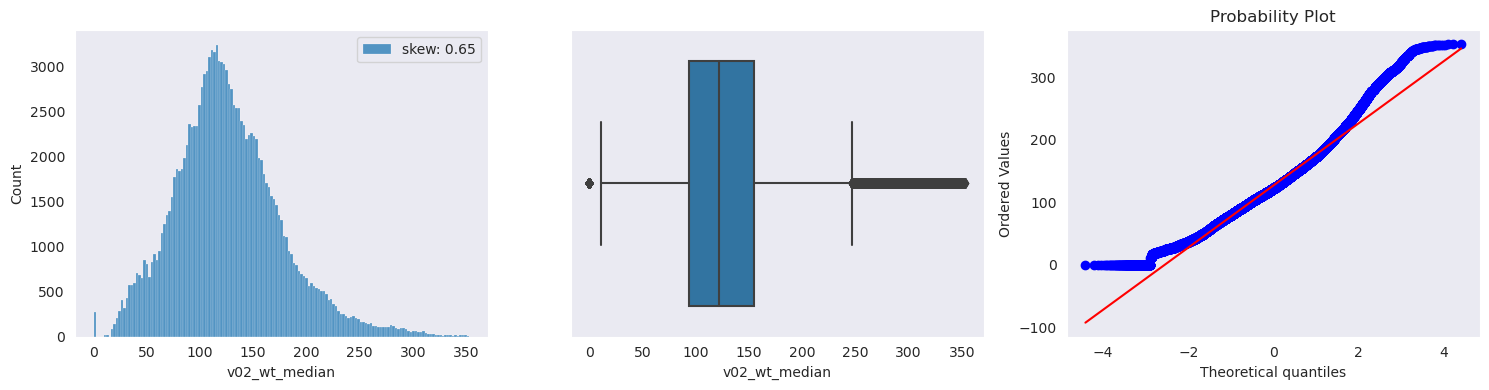

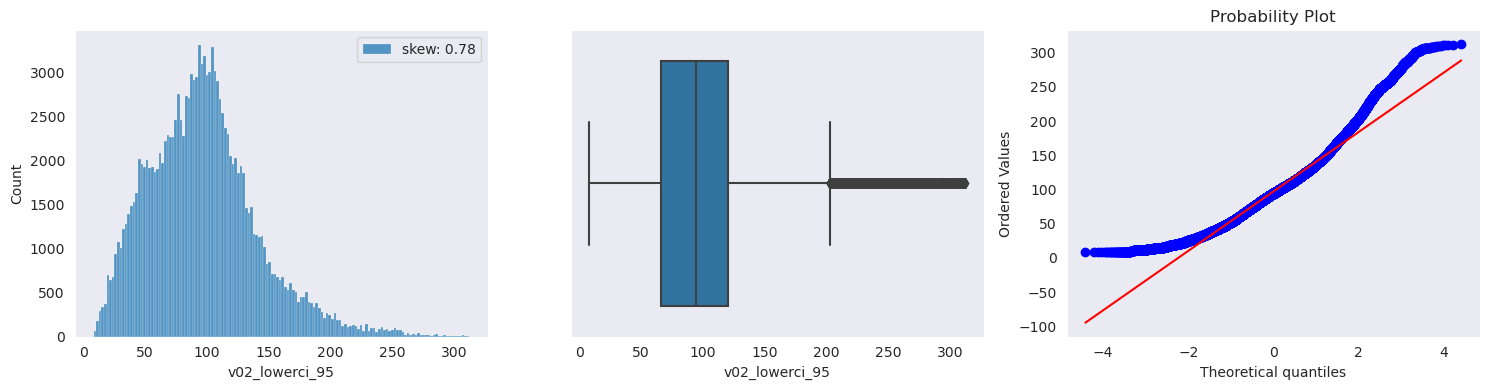

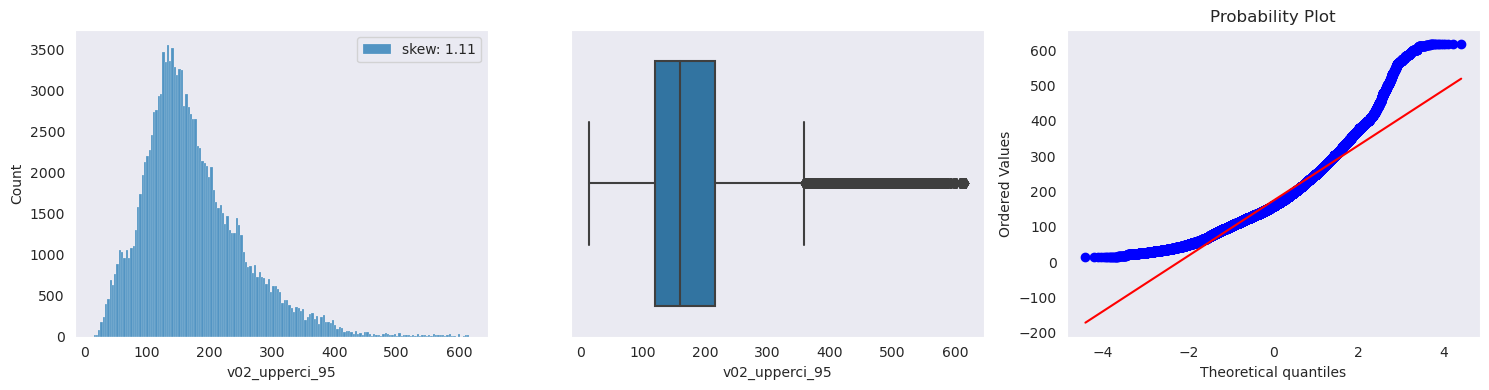

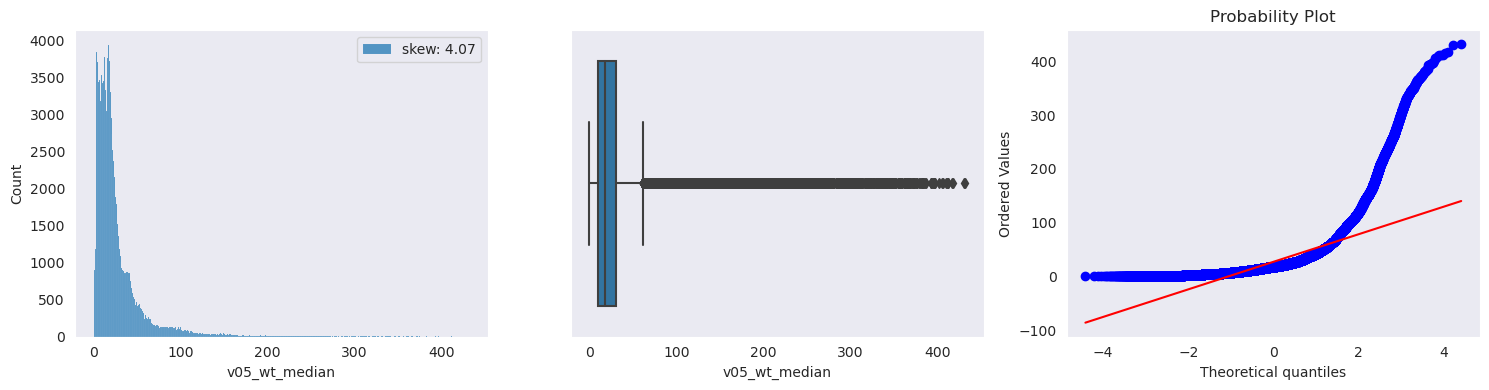

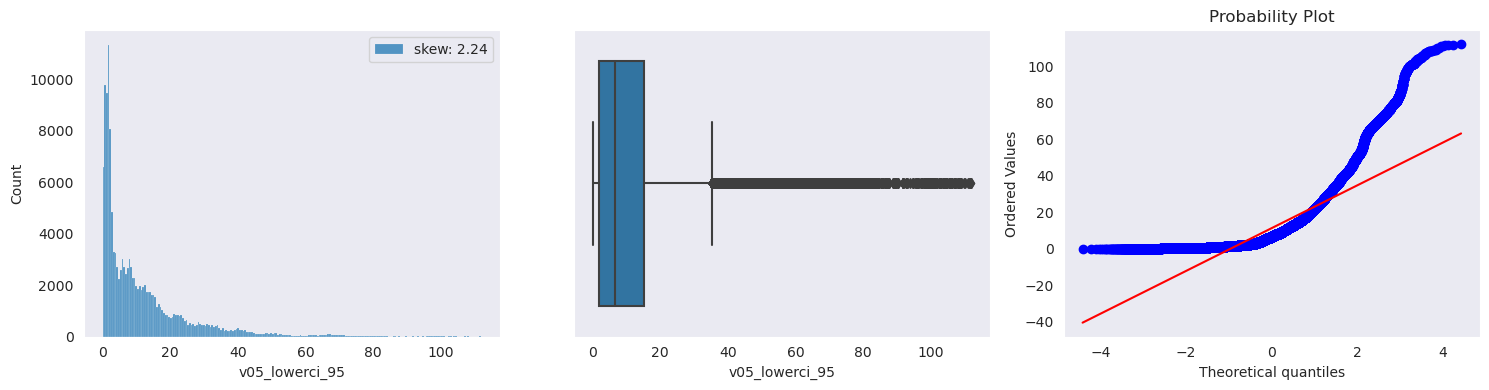

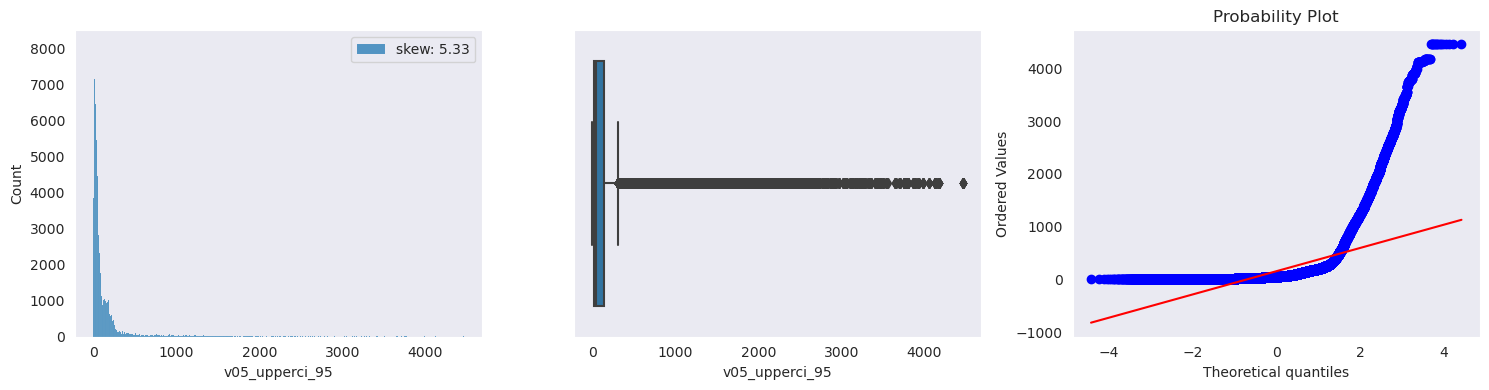

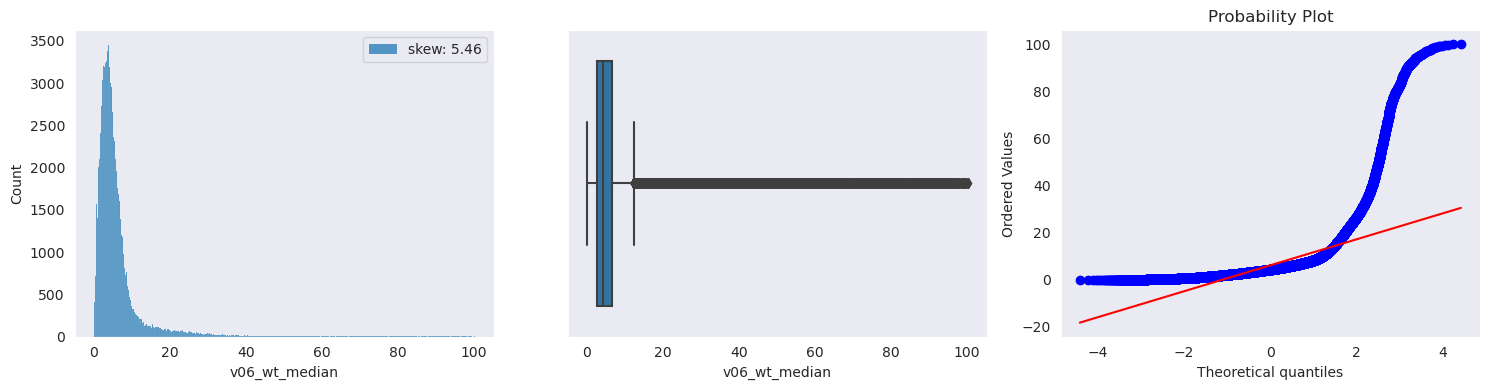

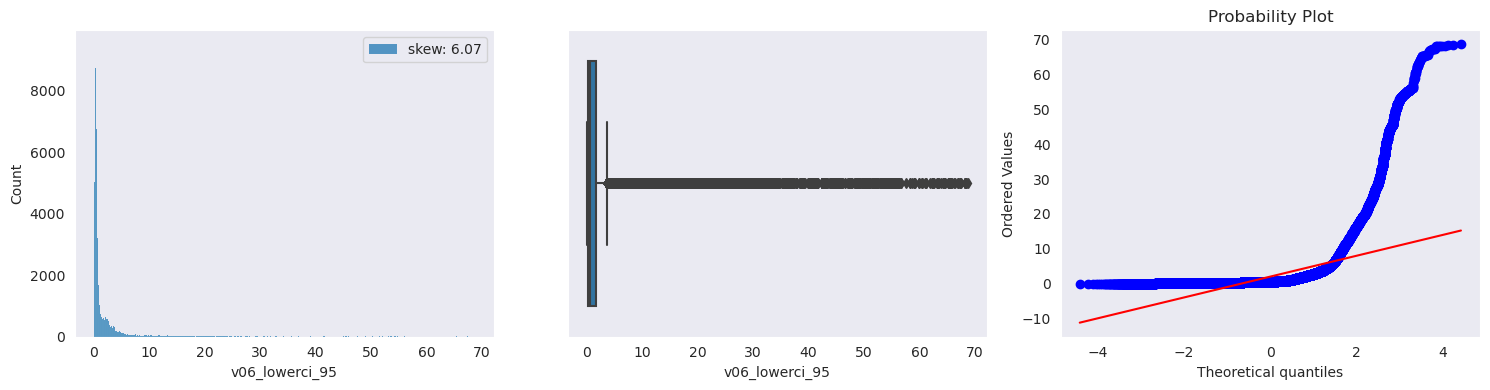

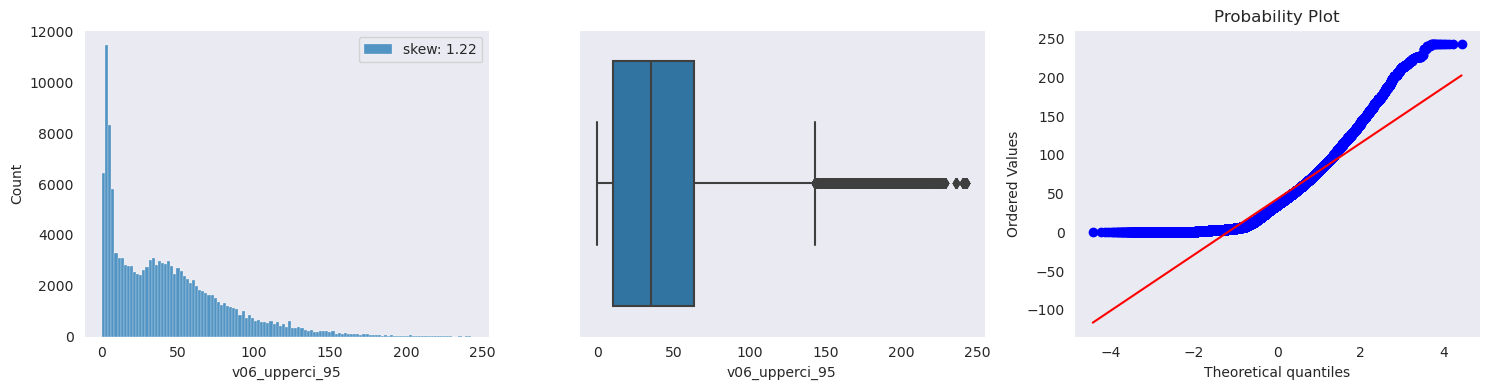

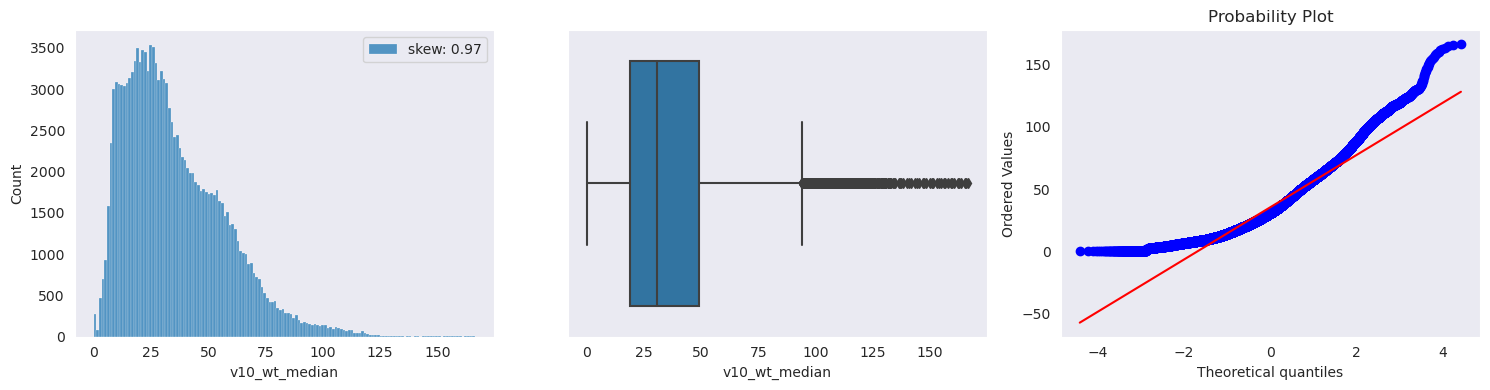

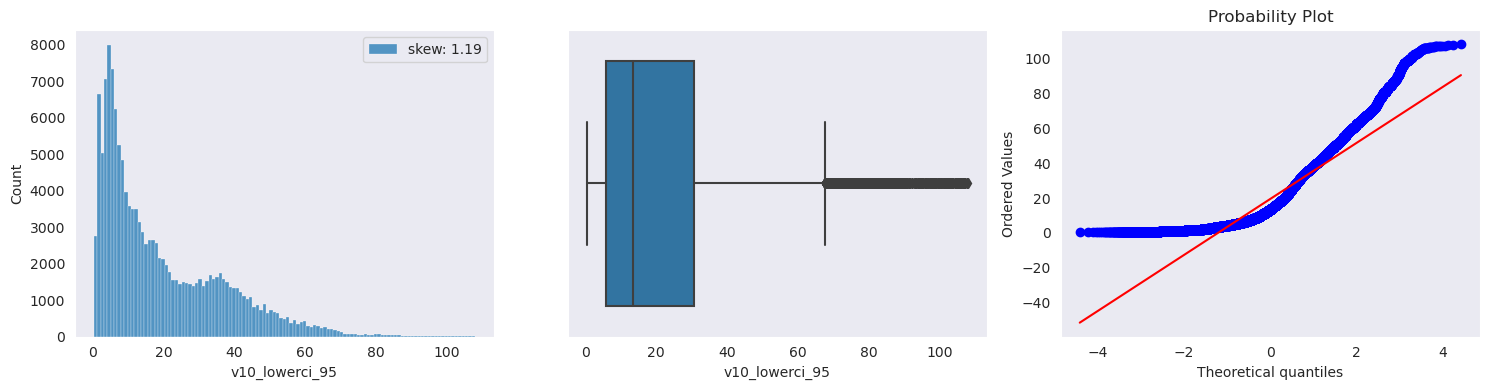

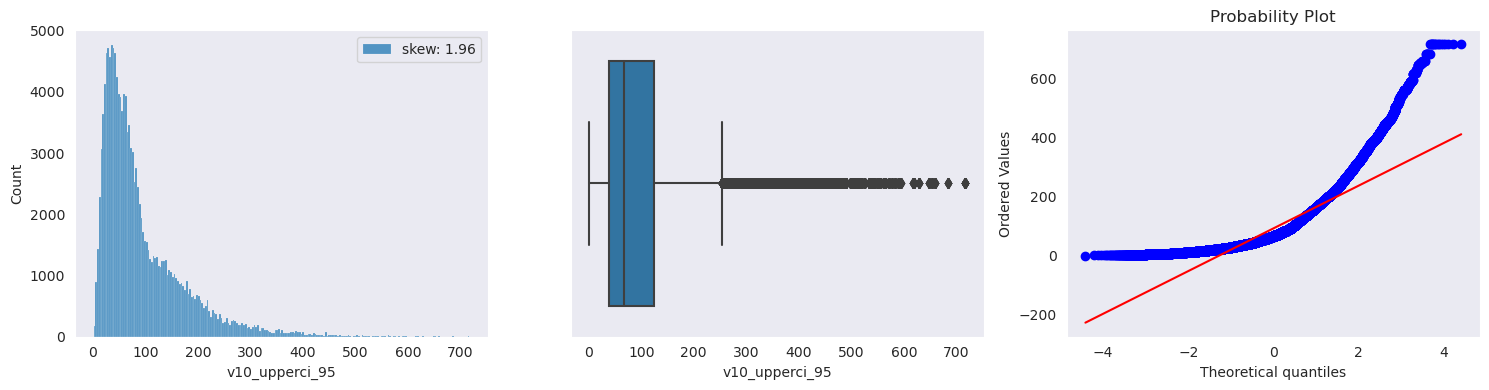

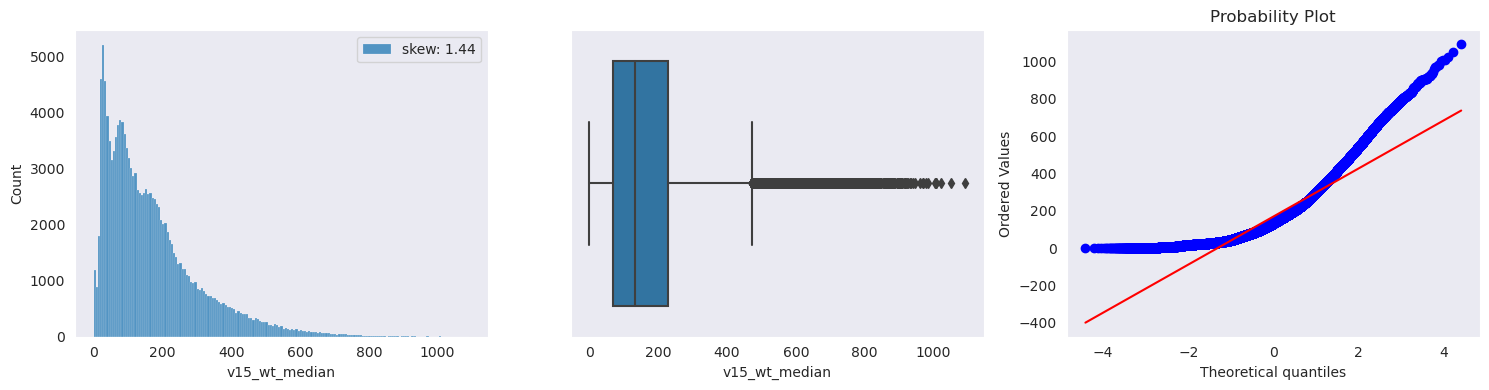

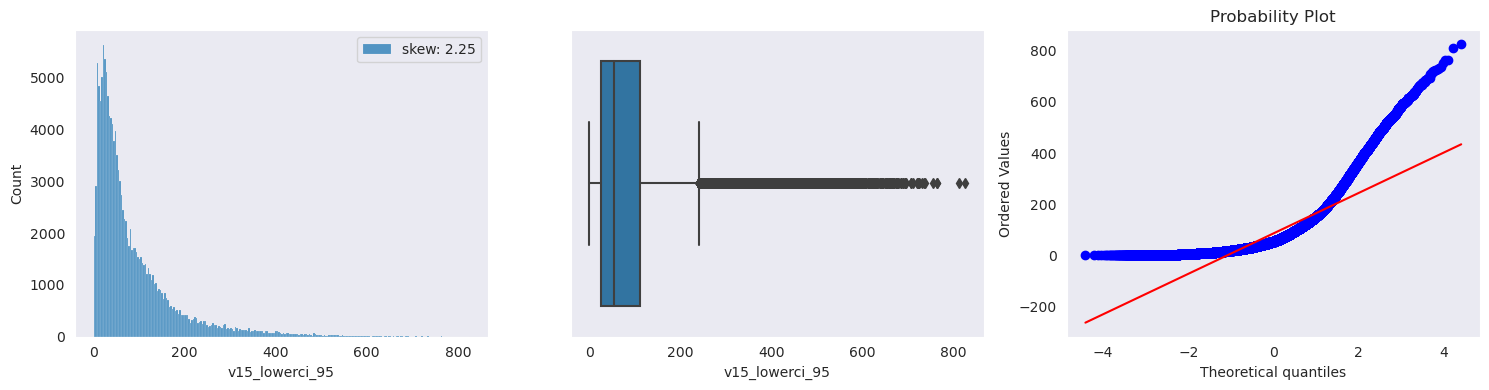

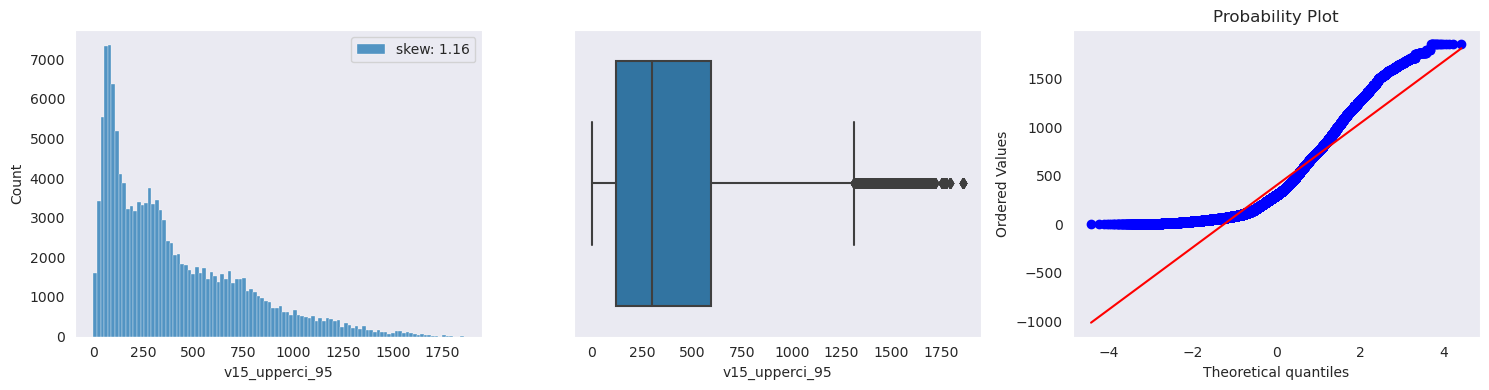

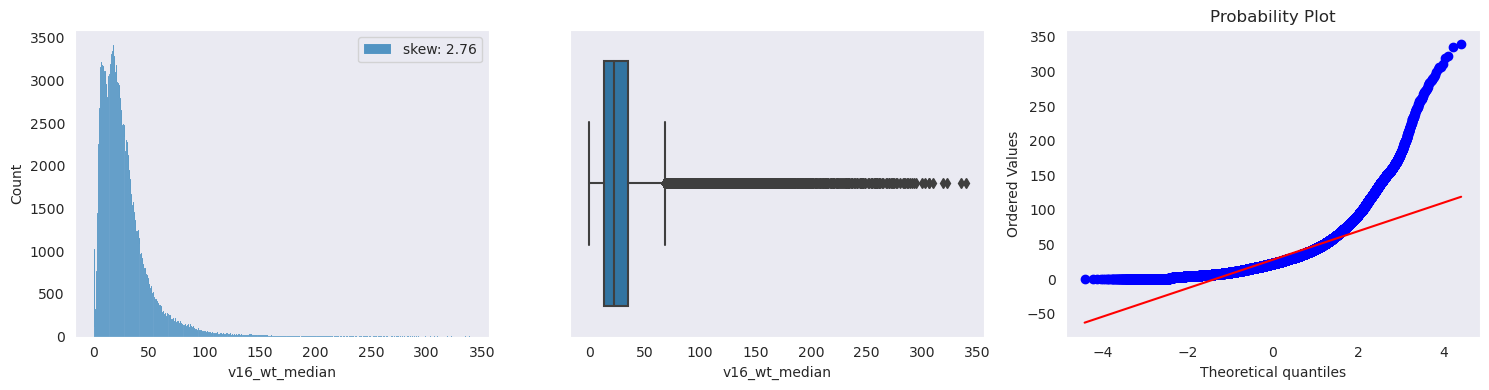

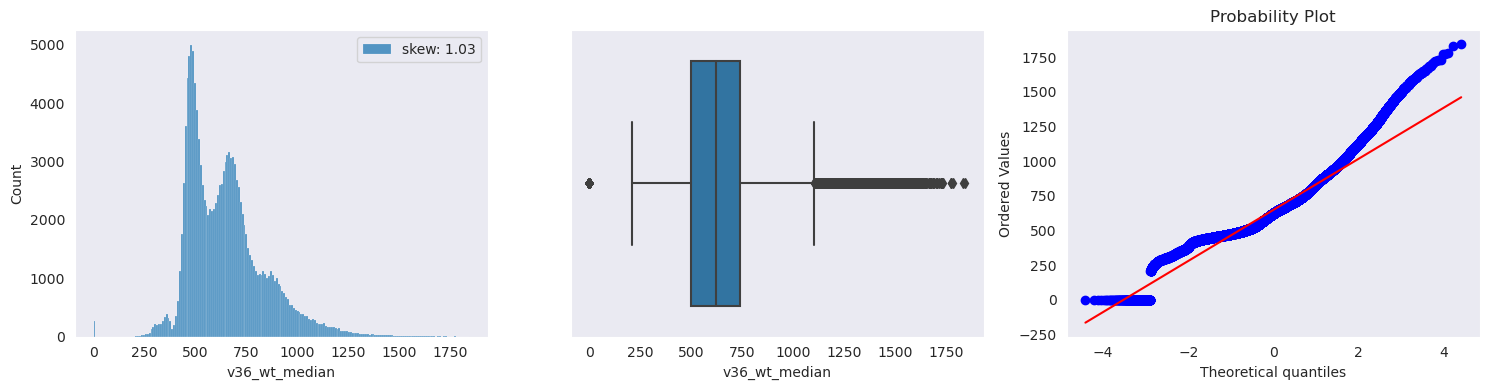

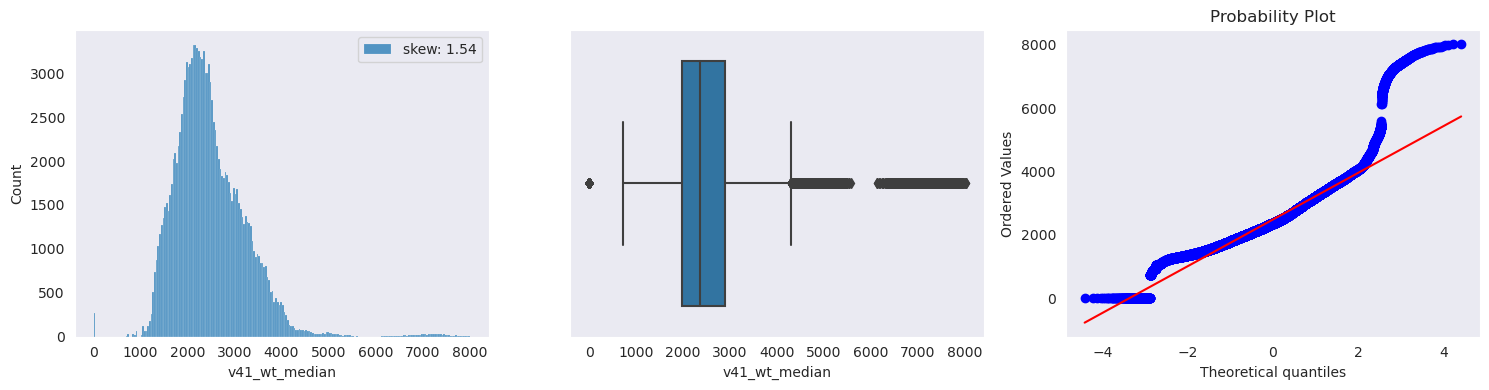

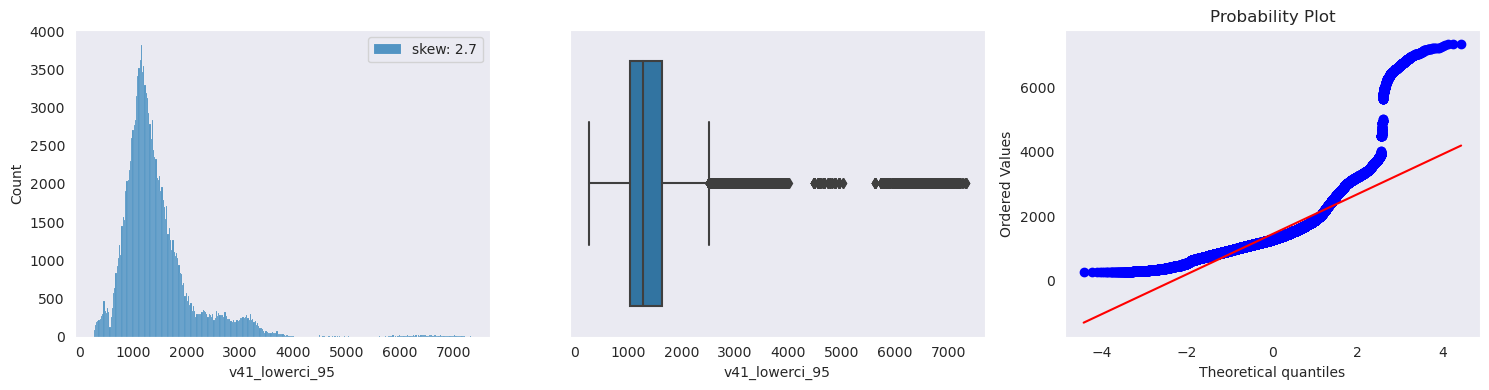

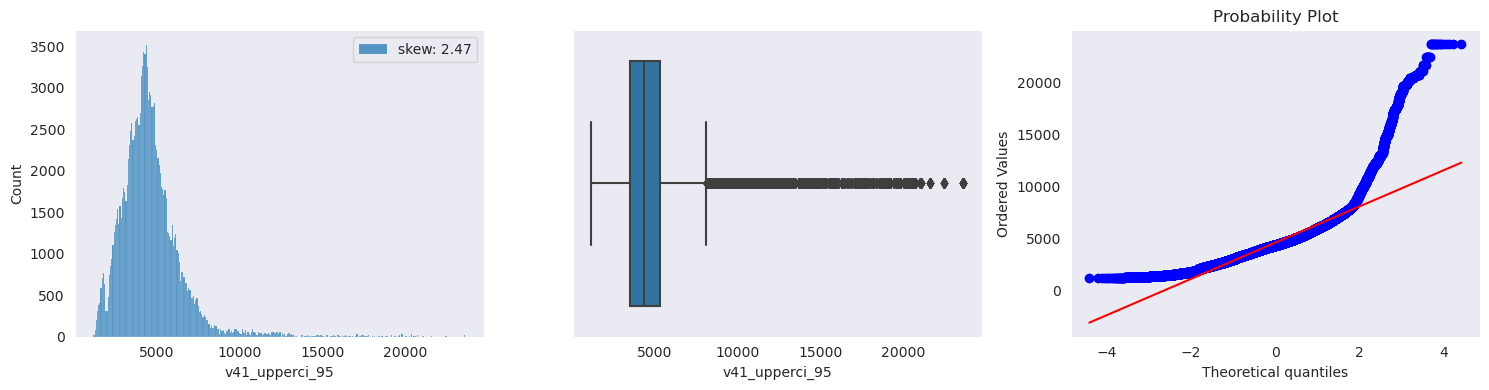

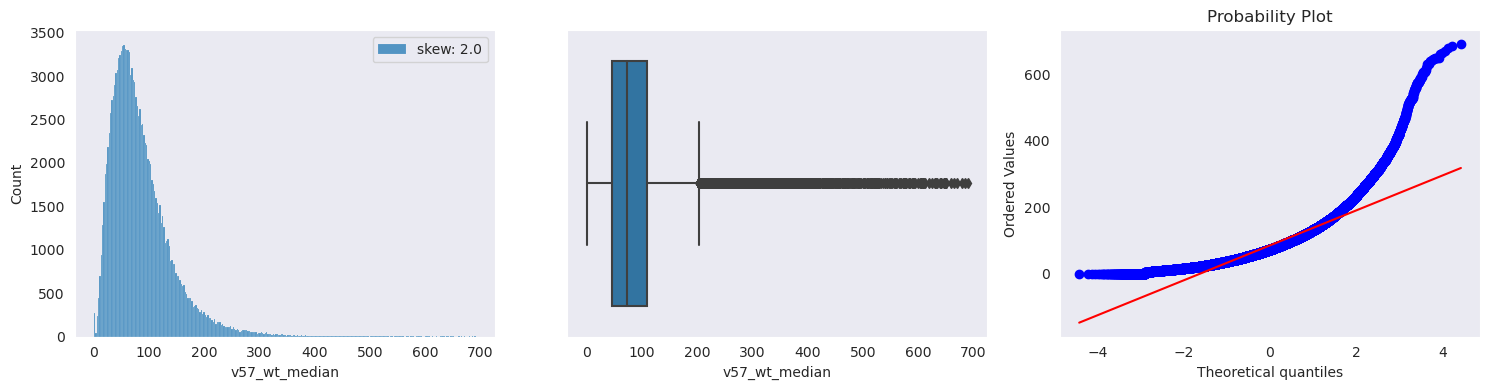

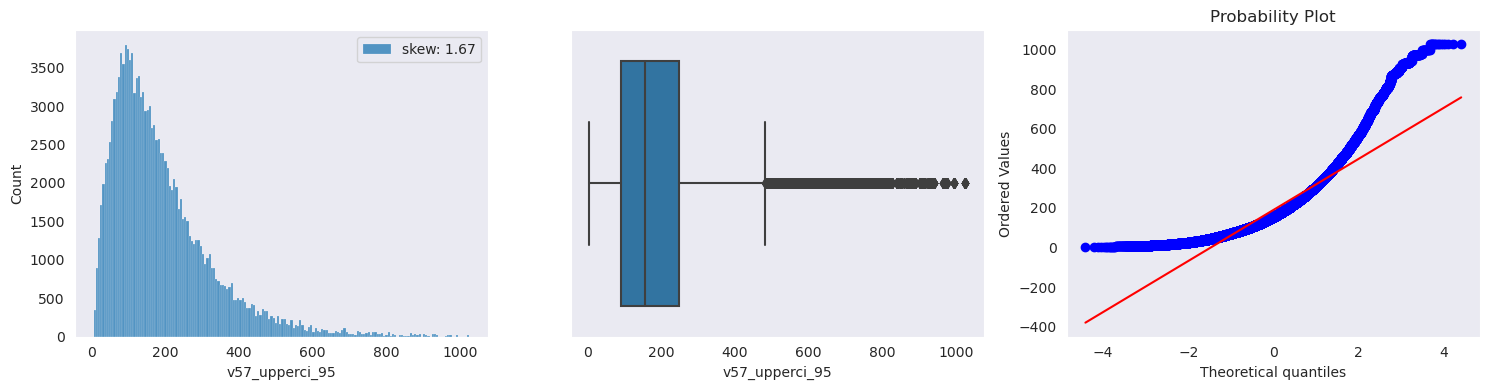

In [6]:
sns.set_style('dark')
df = dietBase.drop(['countryname','superregion2','iso3'], axis='columns')
features = df.columns
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(x=df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[col])
    plt.subplot(133)
    stats.probplot(x=df[col], plot=plt)
    plt.tight_layout()
    plt.show()

**2. Drop redundant information (columns)**

In [7]:
dietBase.drop(['superregion2', 'iso3'], axis='columns', inplace=True)

**3. Check missing values**

In [8]:
#Show number of missing values for every column
print(dietBase.isnull().sum().sort_values(ascending=False))
print('the total number of rows is ', dietBase.shape[0])

countryname       0
v23_upperci_95    0
v15_lowerci_95    0
v15_upperci_95    0
v16_wt_median     0
v16_lowerci_95    0
v16_upperci_95    0
v23_wt_median     0
v23_lowerci_95    0
v36_wt_median     0
female            0
v36_lowerci_95    0
v36_upperci_95    0
v41_wt_median     0
v41_lowerci_95    0
v41_upperci_95    0
v57_wt_median     0
v57_lowerci_95    0
v15_wt_median     0
v10_upperci_95    0
v10_lowerci_95    0
v10_wt_median     0
age               0
urban             0
edu               0
v01_wt_median     0
v01_lowerci_95    0
v01_upperci_95    0
v02_wt_median     0
v02_lowerci_95    0
v02_upperci_95    0
v05_wt_median     0
v05_lowerci_95    0
v05_upperci_95    0
v06_wt_median     0
v06_lowerci_95    0
v06_upperci_95    0
v57_upperci_95    0
dtype: int64
the total number of rows is  139860


# Covid-19 Base



**1. Read and Analyze data**


In [9]:
covidBase = pd.read_csv('/kaggle/input/covid-diet-data/basecovid.csv')
covidBase.shape

(61900, 12)

In [10]:
covidBase

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      12/14/2020   14     12  2020    746       6             Afghanistan   
1      12/13/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      12/11/2020   11     12  2020     63      10             Afghanistan   
4      12/10/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895   3/25/2020   25      3  2020      0       0                Zimbabwe   
61896   3/24/2020   24      3  2020      0       1                Zimbabwe   
61897   3/23/2020   23      3  2020      0       0                Zimbabwe   
61898   3/22/2020   22      3  2020      1       0                Zimbabwe   
61899   3/21/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
0        AF                  AFG   38041757.0         Asia   
1        AF                  AFG   38041757.0         Asia   
2        AF                  AFG   38041757.0         Asia   
3        AF                  AFG   38041757.0         Asia   
4        AF                  AFG   38041757.0         Asia   
...     ...                  ...          ...          ...   
61895    ZW                  ZWE   14645473.0       Africa   
61896    ZW                  ZWE   14645473.0       Africa   
61897    ZW                  ZWE   14645473.0       Africa   
61898    ZW                  ZWE   14645473.0       Africa   
61899    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                               9.013779           
1                                               7.052776           
2                                               6.868768           
3                                               7.134266           
4                                               6.968658           
...                                                  ...           
61895                                                NaN           
61896                                                NaN           
61897                                                NaN           
61898                                                NaN           
61899                                                NaN           

[61900 rows x 12 columns]

In [11]:
covidBase.describe()

day         month          year          cases        deaths  \
count  61900.000000  61900.000000  61900.000000   61900.000000  61900.000000   
mean      15.628934      7.067157   2019.998918    1155.147237     26.055460   
std        8.841582      2.954776      0.032882    6779.224479    131.227055   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  \
count  6.177700e+04   
mean   4.098770e+07   
std    1.531294e+08   
min    8.150000e+02   
25%    1.293120e+06   
50%    7.169456e+06   
75%    2.851583e+07   
max    1.433784e+09   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
count                                       59021.000000           
mean                                           66.320586           
std                                           162.329240           
min                                          -147.419587           
25%                                             0.757526           
50%                                             6.724045           
75%                                            52.572719           
max                                          1900.836210

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(covidBase.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:>

In [13]:
sns.set_style('dark')
df = covidBase.drop(['dateRep','geoId','countryterritoryCode','countriesAndTerritories', 'continentExp','day','year','month'], axis='columns')
features = df.columns
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x=df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[col])
    plt.subplot(133)
    stats.probplot(x=df[col], plot=plt)
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


After Analysing the data, we notice that some features are redundant (country information), and some of them contain NaN values (cumulative number) and others are negative.

**2. Delete redundant features.**

In [14]:
covidBase.drop(['dateRep', 'geoId', 'countryterritoryCode', 'continentExp'], axis='columns', inplace=True)

**3. Treat Missing values**



In [15]:
print(covidBase.isnull().sum().sort_values(ascending=False))
print('the total number of rows is ', covidBase.shape[0])

Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
popData2019                                                    123
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
dtype: int64
the total number of rows is  61900


We notice that the only attribut that exceeds 20% is the **Cumulative_number_for_14_days_of_COVID-19_cases_per_100000**, So We have Three possible solutions:

1.   delete rows with missing values.
2.  Delete whole column
3. Deleting rows will extremly reduce the number of data which will reduce the quality of our solution. Deleting the column is wrong, because it represents the target. The solution i will opt for is to fill manually the missing data with the apropriate equation : Cumul of day x = ((sum of cases of 14days before the day x)/population)*100000



In [16]:
for index in range(covidBase.shape[0]-14):
  if(math.isnan(covidBase.loc[index]['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])):
    sum = 0
    for i in range(14):
      if(covidBase.loc[index]['countriesAndTerritories'] == covidBase.loc[index+i]['countriesAndTerritories']):
        sum = sum + covidBase.loc[index+i]['cases']
    covidBase.at[index, 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = (sum/covidBase.loc[index]['popData2019'])*100000

#after manually filling the values, Some NaN values will remane, so we delete the according rows
covidBase = covidBase.dropna(subset=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

**4. Delete rows with noisy (wrong) data**


*   We notice that death cases and cumulative contains negative values which is not logical.



In [17]:
print(len(covidBase[covidBase['cases'] <0]))
print(len(covidBase[covidBase['deaths'] <0]))
print(len(covidBase[covidBase['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] <0]))

17
8
40


In [18]:
covidBase = covidBase[covidBase['cases'] >=0]
covidBase = covidBase[covidBase['deaths'] >=0]
covidBase = covidBase[covidBase['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] >=0]

**5. Population has a different value for every country, having the same scale for deaths and cases is not logical. To solve this, we replace cases and deaths with % ((deaths*100)/population)**

In [19]:
# Earlier we deleted some rows, we need to reset the index
covidBase.reset_index(drop=True, inplace=True)

covidBase["cases"] = pd.to_numeric(covidBase["cases"], downcast="float")
covidBase["deaths"] = pd.to_numeric(covidBase["deaths"], downcast="float")

for i in range(covidBase.shape[0]):
  covidBase.at[i, 'cases'] = ((covidBase.loc[i]['cases'])*100)/covidBase.loc[i]['popData2019']
  covidBase.at[i, 'deaths'] = ((covidBase.loc[i]['deaths'])*100)/covidBase.loc[i]['popData2019']
covidBase.drop(['popData2019'], axis='columns', inplace=True)




# MERGE DATABASES






**Select the appropriate rows in dietBase**

In the dietBase, examples are grouped by age, education and urban categories. The value 999 neglects the category type, for example age=999 means all ages, female =999 means that both genders are concerned. The covidBase estimates the features for all genders, ages and regions, for this reason we will consider in dietBase only rows with 999 values.


In [20]:
dietBase= dietBase[(dietBase["female"]==999) & (dietBase["age"]==999) & (dietBase["urban"]==999) & (dietBase["edu"]==999)]
dietBase.drop(['female', 'age', 'urban', 'edu'], axis='columns', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
covidBase.rename(columns = {'countriesAndTerritories':'countryname'}, inplace = True)
DataMerged = covidBase.merge(dietBase,on='countryname')
DataMerged.shape

(40421, 40)

# Handling outliers (CovidBase)

After analysing the boxplots above, we notice that we have a considerable number of outliers in the covid dataset, we can simply use Trimming or windsorizing methods to deal with them (remove or replace them). BUT, in our case, these information might be significant, they probably represent the period were contaminations and deaths were epic. Therfor, i will keep them and delete the distant points only 

In [22]:
px.box(data_frame=DataMerged, x="deaths")

In [23]:
DataMerged = DataMerged[DataMerged['deaths']<0.003]

In [24]:
px.box(data_frame=DataMerged, x="deaths")

In [25]:
px.box(data_frame=DataMerged, x="Cumulative_number_for_14_days_of_COVID-19_cases_per_100000")

In [26]:
px.box(data_frame=DataMerged, x="cases")

In [27]:
DataMerged = DataMerged[DataMerged['cases']<0.18]

In [28]:
px.box(data_frame=DataMerged, x="cases")

# Handling outliers (DietBase)

After analysing the boxplots above, we notice a small number of outliers for every feature. We can remove them, but these will highly decrease the number of rows (the dataset will have about 2500 row). I have chosen to replace them with the min or max value

In [29]:
#features =  DataMerged.drop(['day','month','year','cases', 'deaths','countryname','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis='columns').columns
#for col in features :
#  Q1 = np.percentile((DataMerged[col]), 25, interpolation = 'midpoint')
#  Q3 = np.percentile((DataMerged[col]), 75, interpolation = 'midpoint')
#  IQR = Q3 - Q1
#  upper=Q3+1.5*IQR
#  lower=Q1-1.5*IQR
#  DataMerged[DataMerged[col]>upper]=upper
#  DataMerged[DataMerged[col]<lower]=lower

In [30]:
DataMerged.v01_wt_median.loc[DataMerged.v01_wt_median > 180]  = 177.29
DataMerged.v01_lowerci_95.loc[DataMerged.v01_lowerci_95 > 88]  = 87.23
DataMerged.v02_wt_median.loc[DataMerged.v02_wt_median > 223]  = 222.62
DataMerged.v02_upperci_95.loc[DataMerged.v02_upperci_95 > 401]  = 400.63
DataMerged.v02_lowerci_95.loc[DataMerged.v02_lowerci_95 > 84]  = 83.88
DataMerged.v05_wt_median.loc[DataMerged.v05_wt_median > 40]  = 38.34
DataMerged.v05_lowerci_95.loc[DataMerged.v05_lowerci_95 > 15]  = 14.03
DataMerged.v05_upperci_95.loc[DataMerged.v05_upperci_95 > 329]  = 328
DataMerged.v06_wt_median.loc[DataMerged.v06_wt_median > 10]  = 9.2
DataMerged.v06_lowerci_95.loc[DataMerged.v06_lowerci_95 > 2.5]  = 2.29
DataMerged.v10_upperci_95.loc[DataMerged.v10_upperci_95 > 300]  = 282.1
DataMerged.v15_wt_median.loc[DataMerged.v15_wt_median > 422]  = 421
DataMerged.v15_lowerci_95.loc[DataMerged.v15_lowerci_95 > 85]  = 84.17
DataMerged.v16_wt_median.loc[DataMerged.v16_wt_median > 63]  = 62.22
DataMerged.v16_lowerci_95.loc[DataMerged.v16_lowerci_95 > 17]  = 16.17
DataMerged.v23_lowerci_95.loc[DataMerged.v23_lowerci_95 > 50]  = 49.5
DataMerged.v57_wt_median.loc[DataMerged.v57_wt_median > 200]  = 179.57
DataMerged.v41_lowerci_95.loc[DataMerged.v41_lowerci_95 > 2000]  = 1922.192
DataMerged.v41_wt_median.loc[DataMerged.v41_wt_median > 5000]  = 4172.5


# Standardization



  
Many Algorithms get effected by features based on different scales, predictions will go wrong. Many solutions are present, I have chosen the Standardization because it is not sensitive to outliers (our dataset present many of them).

In [31]:
DataMergedStand    = DataMerged.drop(['day','month','year','countryname'], axis='columns')
DataMergedNotStand = DataMerged[['day','month','year','countryname']].copy()

scale = StandardScaler().fit(DataMergedStand)
X_train_stand = scale.transform(DataMergedStand)
DataMergedStand = pd.DataFrame(X_train_stand, columns=DataMergedStand.columns)
DataMerged =DataMergedNotStand.join(DataMergedStand)

# Encode Data

Many methods are used to encode data. LabelEncoder and OneHotEncoder are the most popular. OneHotEncoder is used to encode categorical **features** where the order(level, example: high, medium, high) doesn't matter. LabelEncoder is used to encode categorical target where the order matters.

In [32]:
encoder = OneHotEncoder()
country_codes=encoder.fit_transform(DataMerged[['countryname']]).toarray()
country_labels = encoder.categories_
encodedCountriesBase = pd.DataFrame(country_codes, columns=country_labels)
DataMerged.drop(['countryname'], axis='columns', inplace=True)
DataMerged = pd.concat([DataMerged, encodedCountriesBase], axis=1, join='inner')



# Split according to vacc period




The covidBase contains the period from March to december 2020 where the vaccination has started, so we split the data into two datasets : 2019+ jan and feb 2020, March to december 2020. We will process both of datasets separately and check which one gives better results. ==> by concedering these two periods we won't need the date information.



In [33]:
DataMergedBeforeVacc = DataMerged[(DataMerged['year'] == 2019) | ((DataMerged['year']==2020) & ((DataMerged['month']==1 )|(DataMerged['month']==2)))].copy()
DataMergedAfterVacc = DataMerged[(DataMerged['year']==2020) & ((DataMerged['month']!=1)&(DataMerged['month']!=2))].copy()
DataMergedBeforeVacc.drop(['day', 'month', 'year'], axis='columns', inplace=True)
DataMergedAfterVacc.drop(['day', 'month', 'year'], axis='columns', inplace=True)

In [34]:
data = DataMergedAfterVacc.copy()

# Cumulative Prediction


# Split The Data



In [35]:
x = data.drop(columns = 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')
y = data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0 )


# Linear Regression



In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_test = lr.predict(x_test)
plt.scatter(y_test, y_pred_test)
print("The learning score on train set",lr.score(x_train,y_train))
print("The learning score on test set",lr.score(x_test,y_test))
print("r2 score = ", r2_score(y_test, y_pred_test)) # Coefficient of determination : measures the prediction quality of a linear regression) | close to 1 means its a good model, close to 0 means its a bad model
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on train set 0.8569540166980008
The learning score on test set 0.874293212629689
r2 score =  0.874293212629689



# Decision Tree




/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



r2 score =  0.8469206681515087
The learning score on train set 0.9882903256681124
The learning score on test set 0.8469206681515087


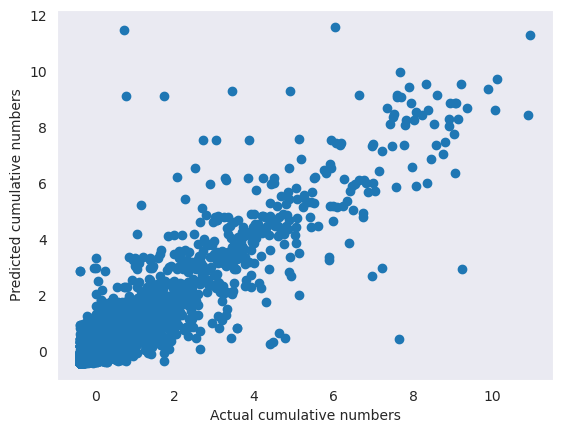

In [37]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
print("r2 score = ",r2_score(y_test, y_predict))
print("The learning score on train set", dt.score(x_train,y_train))
print("The learning score on test set", dt.score(x_test,y_test))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()


# Random Forests



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on train set 0.9763826251086964


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on test set 0.9133980496035362
r2 score =  0.9133980496035362


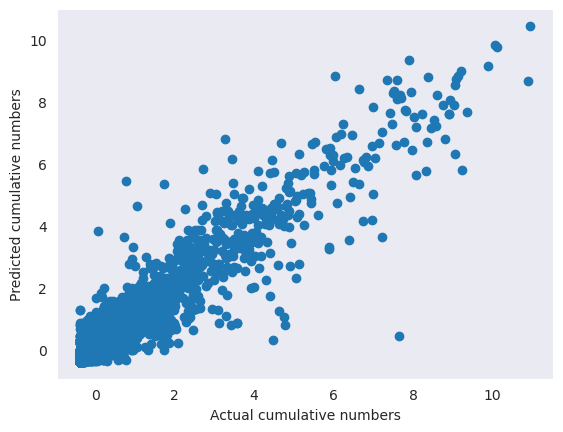

In [38]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("The learning score on train set", rf.score(x_train,y_train))
print("The learning score on test set", rf.score(x_test,y_test))
print("r2 score = ",r2_score(y_test, y_predict))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

# Artificial Neural Networks



In [39]:
nn = MLPRegressor(hidden_layer_sizes=(100,200,100,), activation='tanh',max_iter=500, solver='lbfgs');
nn.fit(x_train, y_train)
predictions =  nn.predict(x_test)
print("The learning score on train set", nn.score(x_train,y_train))
print("The learning score on test set", nn.score(x_test,y_test))
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be r

The learning score on train set 0.9318656491956789


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on test set 0.9219254330844281
0.9219254330844281


# Deaths Prediction


# Split The Data



In [40]:
print(1)

1


In [41]:
x = data.drop(columns = 'deaths')
y = data['deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0 )


# Linear Regression



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on train set 0.5821540706518196
The learning score on test set 0.5755844505810394
0.5755844505810394


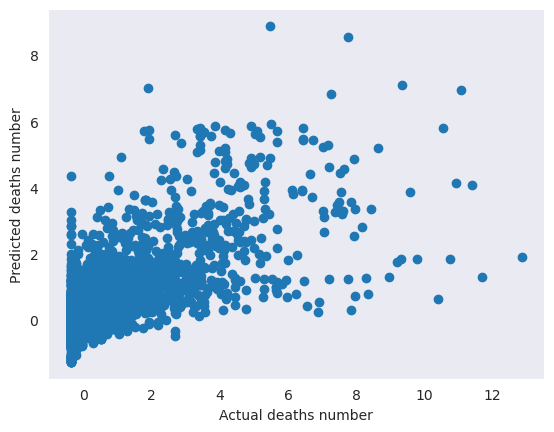

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_test = lr.predict(x_test)
print("The learning score on train set", lr.score(x_train,y_train))
print("The learning score on test set", lr.score(x_test,y_test))
print(r2_score(y_test, y_pred_test)) # Coefficient of determination : measures the prediction quality of a linear regression) | close to 1 means its a good model, close to 0 means its a bad model
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()


# Decision Tree




/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on train set 0.36860333632275777
The learning score on test set 0.371269031312338
r2 score =  0.5755844505810394


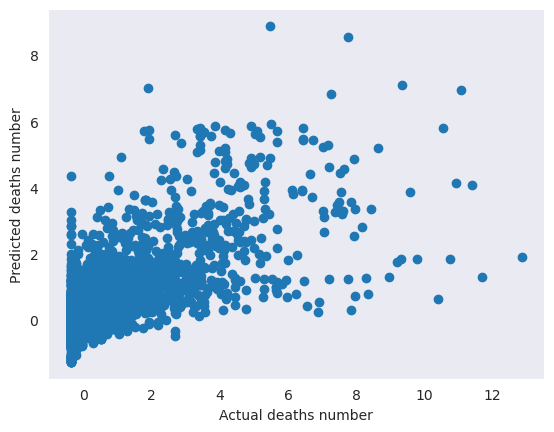

In [43]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=0)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
print("The learning score on train set", dt.score(x_train,y_train))
print("The learning score on test set", dt.score(x_test,y_test))
print("r2 score = ",r2_score(y_test, y_pred_test))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()


# Random Forests



In [44]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("The learning score on train set", rf.score(x_train,y_train))
print("The learning score on test set", rf.score(x_test,y_test))
print("r2 score = ",r2_score(y_test, y_predict))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on train set 0.9626836107365633


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on test set 0.7266010459502534
r2 score =  0.7266010459502534


We might have an overfiting, because : The learning score on test set is much smaller than The learning score on train set

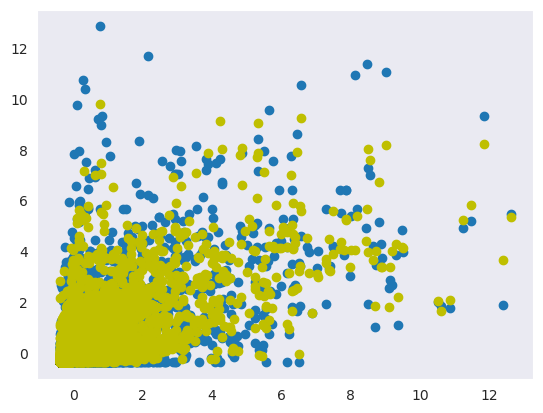

In [45]:
plt.scatter(x_test.iloc[:,0],y_test)
plt.scatter(x_test.iloc[:,0],y_predict, c="y")

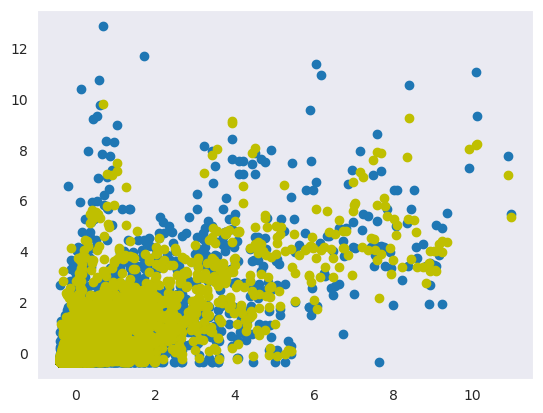

In [46]:
plt.scatter(x_test.iloc[:,1],y_test)
plt.scatter(x_test.iloc[:,1],y_predict, c="y")

# Artificial Neural Networks



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be r

The learning score on train set 0.7693346769830003


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



The learning score on test set 0.7315371220387329
0.7315371220387329


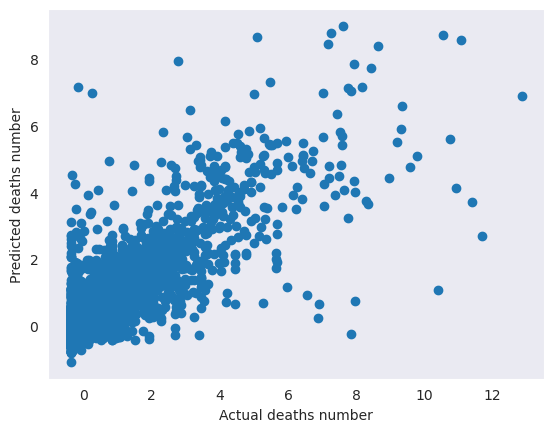

In [47]:
nn = MLPRegressor(hidden_layer_sizes=(100,100,100,), activation='tanh',max_iter=200, solver='lbfgs');
history = nn.fit(x_train, y_train)
predictions =  nn.predict(x_test)
print("The learning score on train set", nn.score(x_train,y_train))
print("The learning score on test set", nn.score(x_test,y_test))
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()



# HyperParameters Optimization (Tuning)



ANN Gave the best r2_score, now it's time to optmize the model parameters using the RandomizedSearchCV method (instead GridSearchCV which takes along execution time).

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



0.7371768304735096


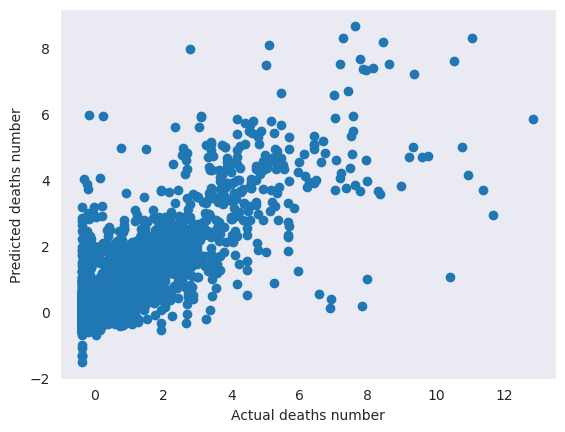

In [48]:
parameters = {
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
nn = MLPRegressor();
NN_random = RandomizedSearchCV(estimator=nn, param_distributions=parameters, cv=3, verbose=2, n_jobs=-1, scoring='neg_mean_absolute_error')
history = NN_random.fit(x_train, y_train)
predictions =  NN_random.predict(x_test)
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()

In [49]:
NN_random.best_params_

{'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'relu'}

## Ideas to improve the project

- Our model is tested on a clean dataset (x_test and y_test), because we have deleted the outliers before predicting the new values. To test the real performance of our model, we better keep outliers for the testing dataset.
- To make this project more significant, we can classify data according to continents (not countries). Because continents present a big variety of food diets. We predict deaths and cumulative numbers for every continent. We can compare the direct effect of food diet on the Covid-19 contaminations.
- Both targets were chosen according to the teacher requirements. Although, I see that we should predict the cases instead of the cumulative numbers, because this variable is just a pourcentage of the registered cases.

## Conclusion

After analysing results, we notice that predicting the cumulative numbers based on the food information is possible, while predicting deaths is not always correct. I suppose that the food diet has a direct impact on getting contaminated by the Covid-19 virus. Deaths are related to the food diet too, but not with a high pourcentage.
